# Markov Chains
**Author:** Gavin DeBrun

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','random']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return
import datetime;datetime.datetime.now()

datetime.datetime(2021, 2, 28, 15, 14, 9, 788109)

## Weather Markov Chains

### Weather Probabilities

|*state*|sunny|cloudy|rainy|
|---------|-------|--------|-------|
|*sunny*  |  0.9  |  0.075 | 0.025|
|*cloudy* | 0.15  |  0.8   | 0.05 |
|*rainy*  | 0.25  | 0.25   | 0.5  |

Sunny Probability is: 0.6318
Cloudy Probability is: 0.3107
Rainy Probability is: 0.0575


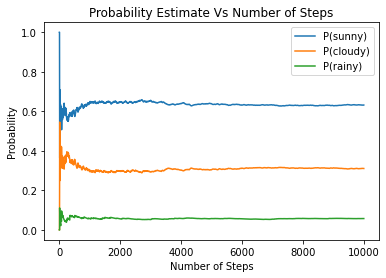

CPU times: user 206 ms, sys: 13.9 ms, total: 220 ms
Wall time: 222 ms


In [2]:
%%time
size = 10000
sunnyDays = np.zeros(size)
cloudyDays = np.zeros(size)
rainyDays = np.zeros(size)

sunnyDays[0] = 1
for i in range(size - 1):

  if (sunnyDays[i] == 1):
    random = np.random.uniform(0,1)
    if (random <= .9):
      sunnyDays[i + 1] = 1
    elif (random <= .975):
      cloudyDays[i + 1] = 1
    elif (random <= 1):
      rainyDays[i + 1] = 1
    
  if (cloudyDays[i] == 1):
    random = np.random.uniform(0,1)
    if (random <= .8):
      cloudyDays[i + 1] = 1
    elif (random <= .95):
      sunnyDays[i + 1] = 1
    elif (random <= 1):
      rainyDays[i + 1] =1
  
  if (rainyDays[i] == 1):
    random = np.random.uniform(0,1)
    if (random <= .5):
      rainyDays[i + 1] = 1
    elif (random <= .75):
      cloudyDays[i + 1] = 1
    elif (random <= 1):
      sunnyDays[i + 1] = 1


print("Sunny Probability is:", np.sum(sunnyDays)/size)
print("Cloudy Probability is:", np.sum(cloudyDays)/size)
print("Rainy Probability is:", np.sum(rainyDays)/size)
plt.plot(np.linspace(1, size, size), np.cumsum(sunnyDays) / np.linspace(1, size, size), label = "P(sunny)")
plt.plot(np.linspace(1, size, size), np.cumsum(cloudyDays) / np.linspace(1, size, size), label = "P(cloudy)")
plt.plot(np.linspace(1, size, size), np.cumsum(rainyDays) / np.linspace(1, size, size), label = "P(rainy)")
plt.xlabel("Number of Steps")
plt.ylabel("Probability")
plt.title("Probability Estimate Vs Number of Steps")
plt.legend()
plt.show()

## 2. The thermodynamics of a paramagnetic material

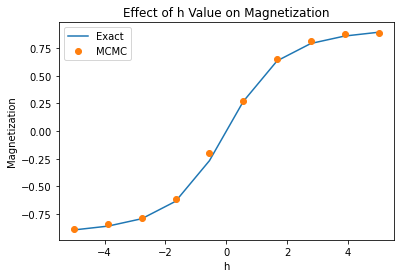

In [3]:
import scipy.special as sps 

def ProbabilityRatio(h, new_theta, old_theta):
  return np.exp(h * (np.cos(new_theta) - np.cos(old_theta) ) )

N = 2000
h_values = np.linspace(-5,5,10)
magnetizations = []


for h in h_values:

  thetas = np.empty(N)
  theta_initial = np.random.uniform(0, 2*np.pi)
  thetas[0] = theta_initial

  for t in range(N - 1):

    r = np.random.uniform(0,1)
    new_theta = thetas[t] + 0.75*np.random.randn()

    if (r < ProbabilityRatio(h, new_theta, thetas[t]) ):
      thetas[t + 1] = new_theta
    else:
      thetas[t + 1] = thetas[t]

  magnetizations.append( np.sum( np.cos(thetas) ) / N)


exact = sps.iv(1, h_values)/sps.iv(0,h_values)
plt.plot(h_values, exact, label = "Exact")
plt.plot(h_values, magnetizations, 'o', label = "MCMC")
plt.title("Effect of h Value on Magnetization")
plt.xlabel("h")
plt.ylabel("Magnetization")
plt.legend()
plt.show()  



## 3: Thermodynamics of rubber bands

### Rubber bands at infinite temperature

In [4]:
average_length = 0
sample_size = 10000
N = 100

for sample in range(sample_size):
  configuration = np.random.randint(2, size=N)
  average_length += float(np.sum(configuration)) / sample_size

print("Average length of a polymer configuration is:", average_length)

Average length of a polymer configuration is: 49.93230000000056


### Rubber bands at finite temperature

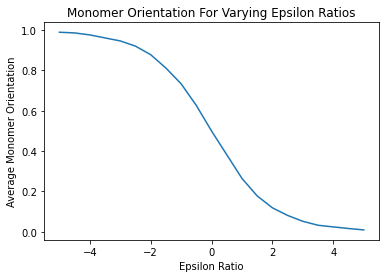

In [5]:
def computeAvgLength(epsilonRatio): 
  N = 10000
  polymer_length = 100


  configuration_length = 0
  initial_configuration = np.random.randint(2, size = polymer_length)

  for step in range(N):
    
    M_initial = np.sum(initial_configuration)
    configuration_length += M_initial

    index_to_change = np.random.randint(0,polymer_length)
    proposed_configuration = initial_configuration.copy()
    proposed_configuration[index_to_change] = (initial_configuration[index_to_change] + 1) % 2
    M_proposed = np.sum(proposed_configuration)
    r = np.random.uniform(0,1)

    if r < np.exp(-(epsilonRatio * (M_proposed - M_initial) ) ):
      initial_configuration = proposed_configuration

  return configuration_length/(N*polymer_length)
    

epsilon_ratios = np.linspace(-5.0, 5.0, 21)
average_monomer_lengths = []
for epsilonRatio in epsilon_ratios:
  average_monomer_lengths.append(computeAvgLength(epsilonRatio))

plt.plot(epsilon_ratios, average_monomer_lengths)
plt.xlabel("Epsilon Ratio")
plt.ylabel("Average Monomer Orientation")
plt.title("Monomer Orientation For Varying Epsilon Ratios")
plt.show()